Import Libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Import Data

In [30]:
data_raw = pd.read_csv("final_test.csv")
data_raw

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [31]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [32]:
data_raw.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [33]:
data_raw['size'].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

<AxesSubplot: xlabel='size', ylabel='count'>

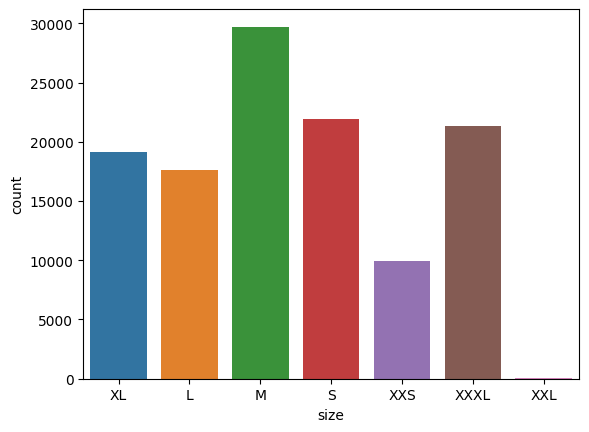

In [34]:
sns.countplot(x=data_raw['size'])

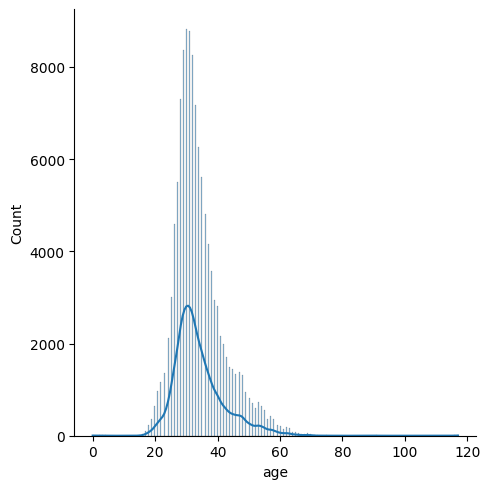

In [35]:
sns.displot(x=data_raw['age'], kde=True)

In [45]:
data_raw.isnull().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [46]:
print(data_raw['age'].mean())

34.027310695782454


In [47]:
data_raw['age'] = data_raw['age'].fillna(data_raw['age'].mean())
data_raw['height'] = data_raw['height'].fillna(data_raw['height'].mean())

In [57]:
data_raw.isnull().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [58]:
data_raw

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [59]:
data_raw['size'].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

In [64]:
data_raw['size_numberic'] = data_raw['size'].map({
    'XXS': 1,
    'S': 2,
    'M': 3,
    'L': 4,
    'XL': 5,
    'XXL': 6,
    'XXXL': 7
})

In [86]:
data_raw['weight']

0         62
1         59
2         61
3         65
4         62
          ..
119729    63
119730    45
119731    61
119732    74
119733    70
Name: weight, Length: 119734, dtype: int64

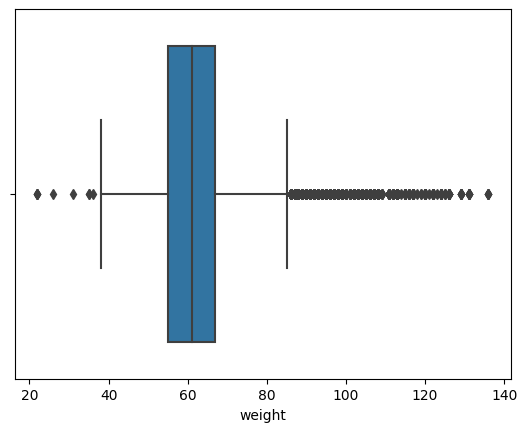

In [87]:
sns.boxplot(x=data_raw['weight'])
plt.show()

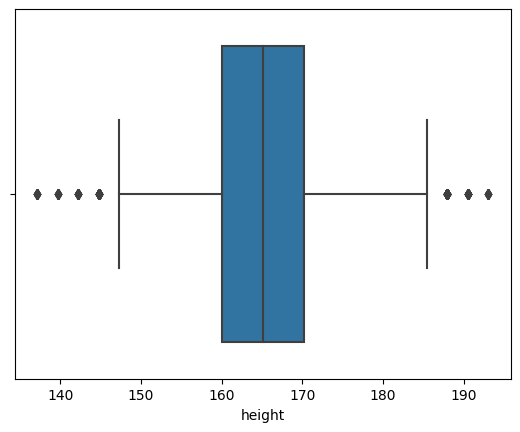

In [119]:
sns.boxplot(x=data_raw['height'])
plt.show()

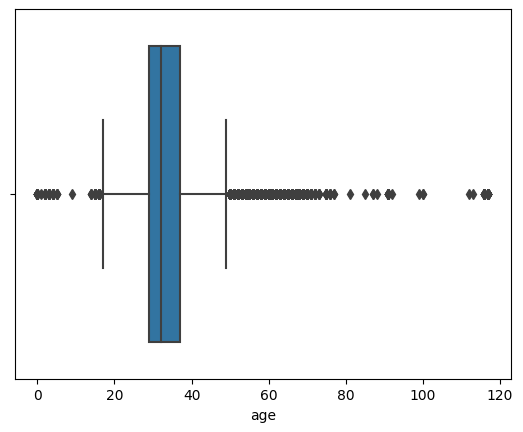

In [120]:
sns.boxplot(x=data_raw['age'])
plt.show()

In [95]:
def outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    lists = df.index[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    return lists

In [96]:
index_lists = []
for feature in ['weight', 'age', 'height']:
    index_lists.extend(outliers(data_raw, feature))

In [97]:
index_lists

[33,
 73,
 74,
 77,
 91,
 98,
 121,
 130,
 196,
 203,
 233,
 304,
 418,
 451,
 558,
 572,
 598,
 612,
 628,
 657,
 696,
 732,
 820,
 825,
 843,
 868,
 871,
 900,
 905,
 961,
 1001,
 1007,
 1010,
 1022,
 1036,
 1052,
 1066,
 1100,
 1165,
 1168,
 1229,
 1239,
 1328,
 1357,
 1439,
 1506,
 1530,
 1574,
 1674,
 1690,
 1735,
 1802,
 1882,
 1898,
 1903,
 2039,
 2078,
 2120,
 2126,
 2144,
 2222,
 2358,
 2365,
 2400,
 2420,
 2439,
 2465,
 2478,
 2500,
 2531,
 2618,
 2681,
 2697,
 2714,
 2769,
 2812,
 2866,
 2995,
 3049,
 3076,
 3118,
 3136,
 3137,
 3142,
 3172,
 3249,
 3250,
 3302,
 3318,
 3329,
 3330,
 3348,
 3385,
 3454,
 3465,
 3470,
 3561,
 3580,
 3608,
 3632,
 3682,
 3696,
 3721,
 3726,
 3741,
 3775,
 3812,
 3850,
 3922,
 3970,
 3991,
 4087,
 4105,
 4120,
 4156,
 4173,
 4211,
 4234,
 4240,
 4245,
 4251,
 4308,
 4387,
 4397,
 4407,
 4460,
 4461,
 4516,
 4523,
 4561,
 4622,
 4635,
 4641,
 4679,
 4695,
 4696,
 4719,
 4756,
 4763,
 4796,
 4814,
 4866,
 4881,
 4898,
 4909,
 4918,
 4925,
 5006,


In [98]:
def remove(df, lists):
    lists = sorted(set(lists))
    df = df.drop(lists)
    return df

In [99]:
df_cleaned = remove(data_raw, index_lists)
df_cleaned.shape

(109605, 5)

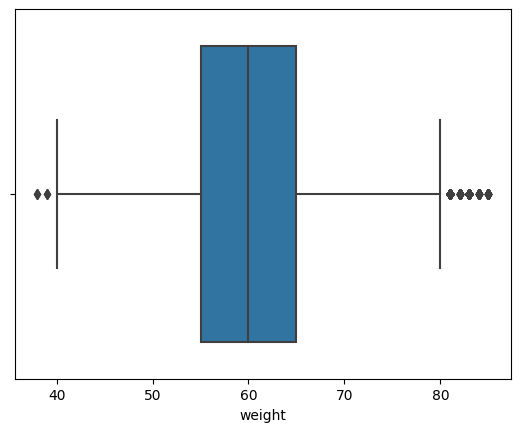

In [104]:
sns.boxplot(x=df_cleaned['weight'])
plt.show()

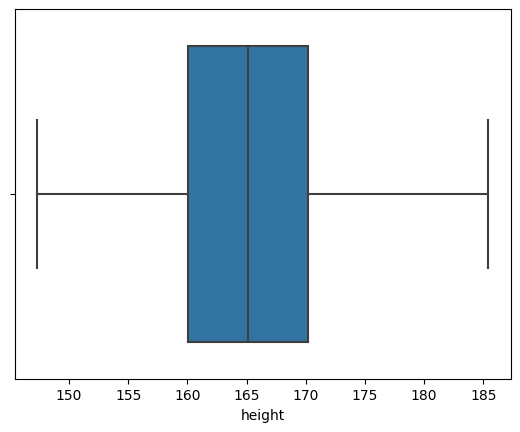

In [122]:
sns.boxplot(x=df_cleaned['height'])
plt.show()

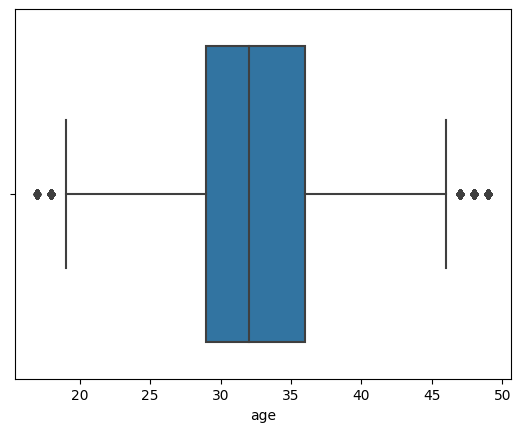

In [121]:
sns.boxplot(x=df_cleaned['age'])
plt.show()

In [105]:
df_cleaned

,weight,age,height,size,size_numberic
0,62,28.0,172.72,XL,5
1,59,36.0,167.64,L,4
2,61,34.0,165.10,M,3
3,65,27.0,175.26,L,4
4,62,45.0,172.72,M,3
...,...,...,...,...,...
119729,63,42.0,175.26,M,3
119730,45,29.0,154.94,S,2
119731,61,31.0,172.72,M,3
119732,74,31.0,167.64,XL,5


In [106]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109605 entries, 0 to 119733
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   weight         109605 non-null  int64  
 1   age            109605 non-null  float64
 2   height         109605 non-null  float64
 3   size           109605 non-null  object 
 4   size_numberic  109605 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 5.0+ MB


In [108]:
X_1 = df_cleaned[['weight', 'age', 'height']]
y_1 = df_cleaned[['size']]

In [110]:
X_1 = X_1.to_numpy()
y_1 = y_1.to_numpy()

In [111]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.15)

In [126]:
model = DecisionTreeClassifier()
model.fit(X_train_1, y_train_1)
y_pred_1 = model.predict(X_test_1)

In [127]:
accuracy_score(y_test_1, y_pred_1)

0.49905723496137705